In [1]:
from scipy.stats import norm, expon, cauchy, geom, poisson, kstest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import timeit

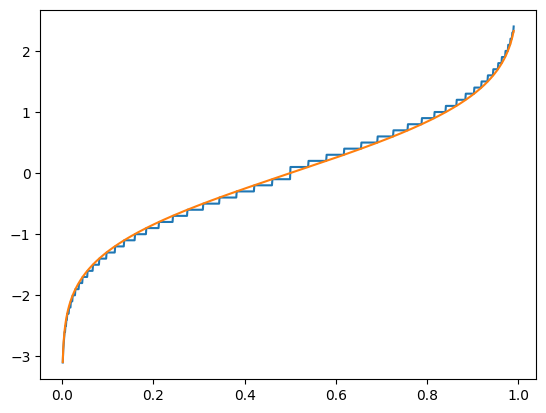

In [3]:
#zadanie 3
def F_inv(u, F=norm, d=0.01, p=None):
    x=0
    p = p or {}
    if x < F.ppf(u, **p):
        while F.cdf(x, **p) < u:
            x += d
        return x
    else:
        while F.cdf(x, **p) > u:
            x -= d
        return x

p = {'loc': 0, 'scale': 1}    
u = np.linspace(0, 0.99, 1000)[1:]
y1 = np.vectorize(F_inv)(u, norm, 0.1, p)
y2 = norm.ppf(u, **p)
plt.plot(u, y1)
plt.plot(u, y2)

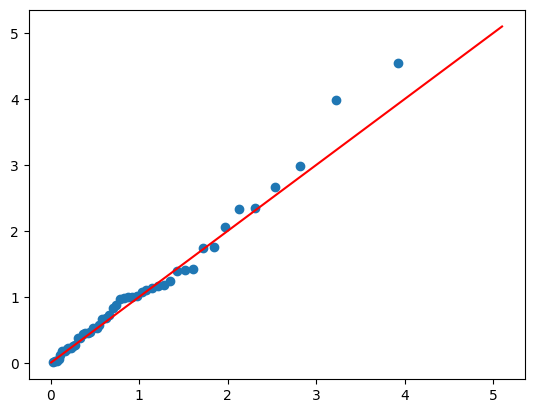

In [16]:
#zadanie 4
X = expon.rvs(0,1,size=50)
def drawqq(X, distr):
    X_sort = np.sort(X)
    N = X.shape[0]
    q = np.arange(1/N, 1, 1/N)
    X_theor = np.vectorize(lambda x: F_inv(x, F=distr))(q)
    plt.plot(X_sort, X_sort, color='red')
    plt.scatter(X_theor, X_sort[:-1])

drawqq(X, expon)

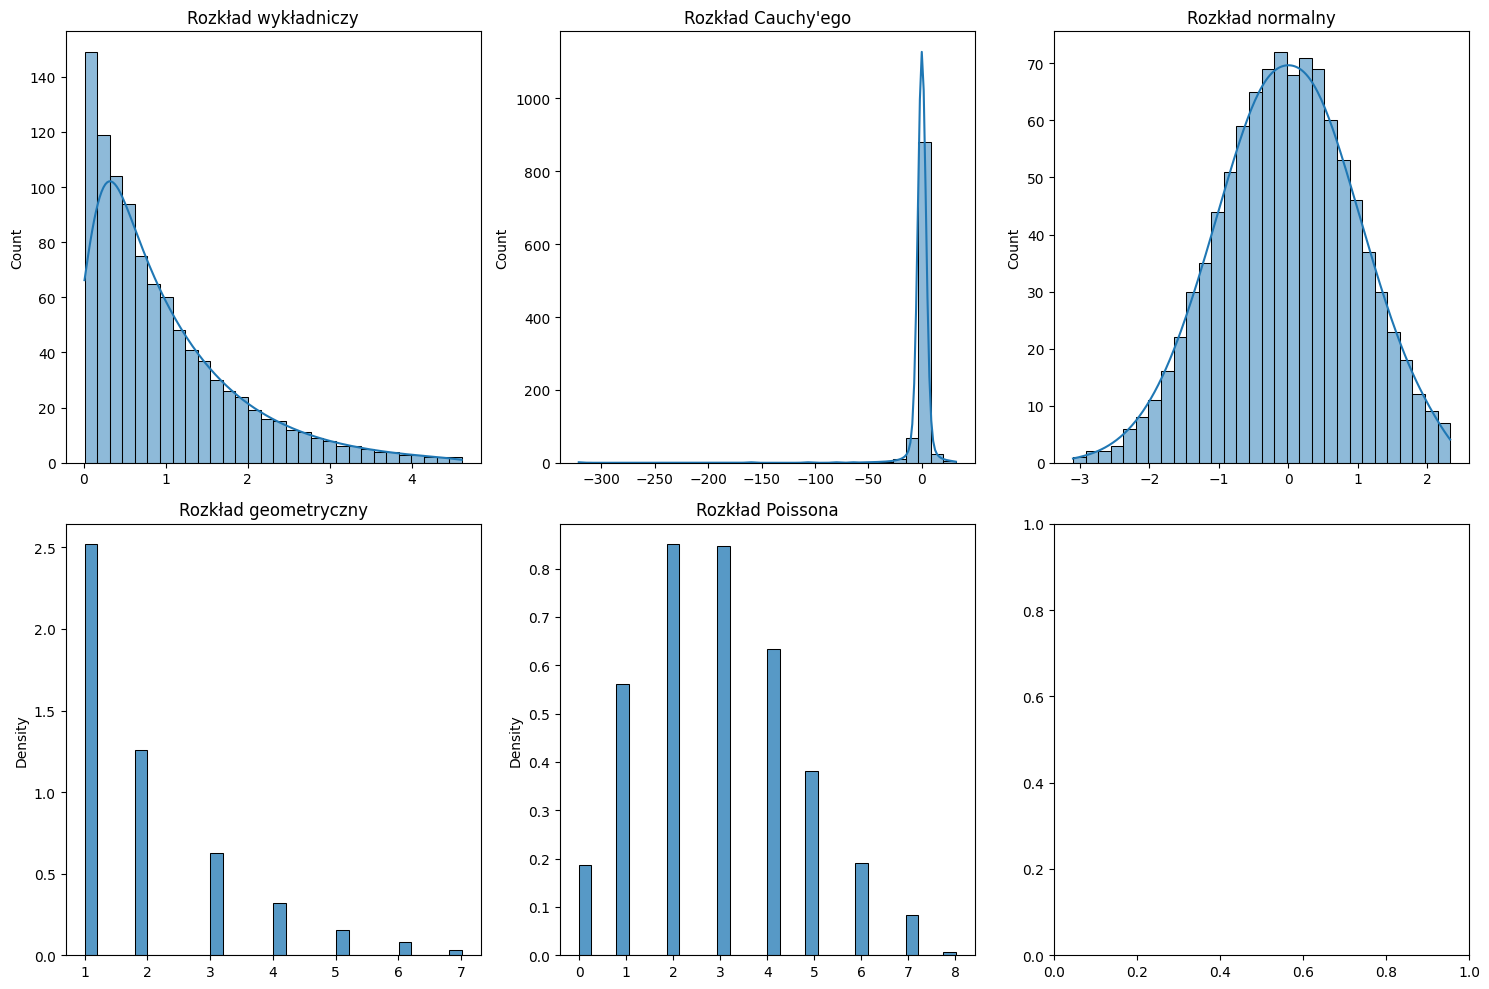

In [4]:
#zadanie 1
U = np.linspace(0, 0.99, 1000)[1:]

exp_samples = np.vectorize(F_inv)(U, expon, p={'scale': 1})
cauchy_samples = np.vectorize(F_inv)(U, cauchy, p={'loc': 0, 'scale': 1})
normal_samples = np.vectorize(F_inv)(U, norm, p={'loc': 0, 'scale': 1})
geo_samples = np.vectorize(F_inv)(U, geom, p={'p': 0.5})
poisson_samples = np.vectorize(F_inv)(U, poisson, p={'mu': 3})

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(exp_samples, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Rozkład wykładniczy")

sns.histplot(cauchy_samples, bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Rozkład Cauchy'ego")

sns.histplot(normal_samples, bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Rozkład normalny")

sns.histplot(geo_samples, bins=30, stat='density', ax=axes[1, 0])
axes[1, 0].set_title("Rozkład geometryczny")

sns.histplot(poisson_samples, bins=30, stat='density', ax=axes[1, 1])
axes[1, 1].set_title("Rozkład Poissona")

plt.tight_layout()
plt.show()

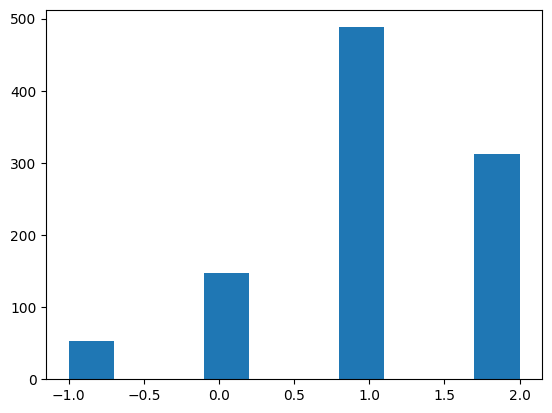

In [5]:
def lookup_table(distribution):
    sum = []
    ps = 0
    for i, p in distribution:
        ps += p
        sum.append((i, ps))
    u = random.random()
    for i, p_sum in sum:
        if u <= p_sum:
            return i
        
distribution = [(-1, 1/16), (0, 1/8), (1, 1/2), (2,5/16)]
samples = [lookup_table(distribution) for i in range(1000)]
plt.hist(samples);

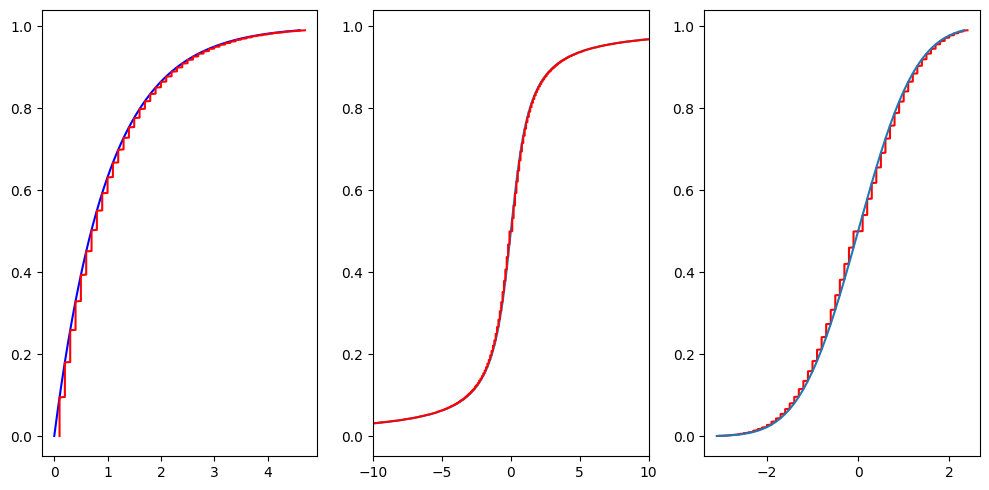

In [6]:
#zadanie 2
#Histogramy i gęstośći zostały pokazane w zadaniu 1

#Dystrybuanty empiryczne i teoretyczne
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

plt.subplot(1, 3, 1)
p = {'scale': 1}
u = np.linspace(0, 0.99, 1000)[1:]
y = np.vectorize(F_inv)(u, expon, 0.1, p)

plt.plot(expon.ppf(u, **p), u, color='blue')
plt.plot(y, u, color='red')

plt.subplot(1,3, 2)

p = {'loc': 0, 'scale': 1}
y = np.vectorize(F_inv)(u, cauchy, 0.1, p)

plt.plot(cauchy.ppf(u, **p), u)
plt.plot(y, u, color='red')
plt.xlim(-10,10)

plt.subplot(1, 3, 3)
p = {'loc': 0, 'scale': 1}    
u = np.linspace(0, 0.99, 1000)[1:]
y1 = np.vectorize(F_inv)(u, norm, 0.1, p)
plt.plot(y1, u, color='red')
plt.plot(norm.ppf(u, **p), u)

plt.tight_layout()

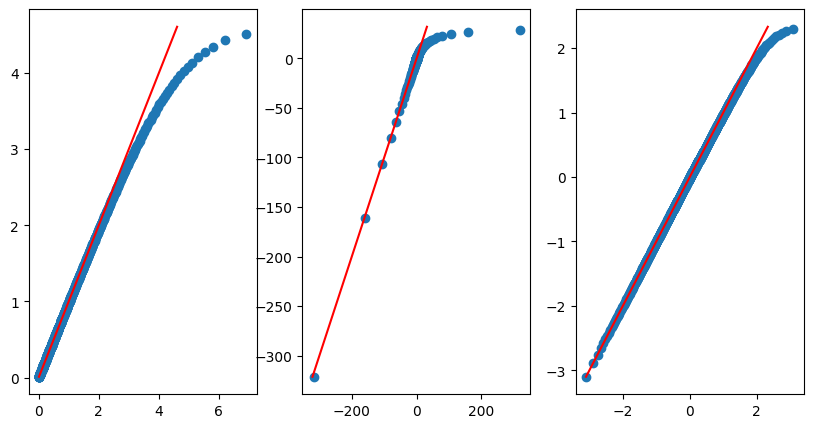

In [7]:
#Wykresy kwantylowe
U = np.linspace(0, 0.99, 1000)[1:]

exp_samples = np.vectorize(F_inv)(U, expon, p={'scale': 1})
cauchy_samples = np.vectorize(F_inv)(U, cauchy, p={'loc': 0, 'scale': 1})
normal_samples = np.vectorize(F_inv)(U, norm, p={'loc': 0, 'scale': 1})

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

plt.subplot(1, 3, 1)

drawqq(exp_samples, expon)

plt.subplot(1, 3, 2)
drawqq(cauchy_samples, cauchy)
plt.subplot(1, 3, 3)
drawqq(normal_samples, norm)

In [8]:
#Średnia próbkowa i teoretyczna
print("Rozkład wykładniczy")
p = {'scale': 1}
u = np.linspace(0, 0.99, 1000)[1:]
y = [F_inv(i, expon, 0.01, p) for i in u]
print("Średnia próbkowa: ", np.mean(y))
print("Średnia teoretyczna: ", 1)
print("Wariancja próbkowa: ", np.var(y))
print("Wariancja teoretyczna: ", 1)

print("Rozkład normalny")
p = {'loc': 0, 'scale': 1}
u = np.linspace(0, 0.99, 1000)[1:]
y = [F_inv(i, norm, 0.01, p) for i in u]
print("Średnia próbkowa: ", np.mean(y))
print("Średnia teoretyczna: ", 0)
print("Wariancja próbkowa: ", np.var(y))
print("Wariancja teoretyczna: ", 1)

print("Rozkład Geometryczny")
p={'p': 0.5}
u = np.linspace(0, 0.99, 1000)[1:]
y = [F_inv(i, geom, 0.01, p) for i in u]
print("Średnia próbkowa: ", np.mean(y))
print("Średnia teoretyczna: ", 2)
print("Wariancja próbkowa: ", np.var(y))
print("Wariancja teoretyczna: ", 2)

Rozkład wykładniczy
Średnia próbkowa:  0.9608108108108091
Średnia teoretyczna:  1
Wariancja próbkowa:  0.7900216649081419
Wariancja teoretyczna:  1
Rozkład normalny
Średnia próbkowa:  -0.02402402402402397
Średnia teoretyczna:  0
Wariancja próbkowa:  0.9408318552787023
Wariancja teoretyczna:  1
Rozkład Geometryczny
Średnia próbkowa:  1.9393693693693606
Średnia teoretyczna:  2
Wariancja próbkowa:  1.5777496523550112
Wariancja teoretyczna:  2


In [9]:
#Testy zgodności
alfa =  0.05
p={'loc': 0, 'scale': 1}
print(kstest(F_inv(0.5, norm, 0.01, p), 'norm', args=(0,1)).pvalue>alfa)
print(kstest(F_inv(0.5, cauchy, 0.01, p), 'cauchy', args=(0,1)).pvalue>alfa)
p={'scale': 1}
print(kstest(F_inv(0.5, expon, 0.01, p), 'expon', args=(0,1)).pvalue>alfa)


True
True
True


In [10]:
#Czas działania
u = np.linspace(0, 0.99, 1000)[1:]
p={'scale': 1}
time_expon = timeit.timeit('[F_inv(i, expon, 0.01, p) for i in u]', globals=globals(), number=1)
print(time_expon)
time_expon = timeit.timeit('expon.rvs(1000)', globals=globals(), number=1)
print(time_expon)
p={'loc': 0, 'scale': 1}
time_norm = timeit.timeit('[F_inv(i, norm, 0.01, p) for i in u]', globals=globals(), number=1)
print(time_norm)
time_norm = timeit.timeit('norm.rvs(1000)', globals=globals(), number=1)
print(time_norm)
time_cauchy = timeit.timeit('[F_inv(i, cauchy, 0.01, p) for i in u]', globals=globals(), number=1)
print(time_cauchy)
time_cauchy = timeit.timeit('cauchy.rvs(1000)', globals=globals(), number=1)
print(time_cauchy)

4.038527400000021
0.00010299999848939478
3.2705382000131067
0.00011419999646022916
12.7844061999931
8.869997691363096e-05
